# Real Estate Valuation - Taiwan

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 

## Goal of this notebook: 
The goal of this notebook is to predict the house price of unit area in Tawain (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

## Source data set: 
UCI Machine Learning Repository [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Attribute Information:
The inputs are as follows:

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

The output is as follow:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 

Reference [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## 1. Import Dataset



In [ ]:
#import library package
import pandas as pd
import numpy as np

In [ ]:
# Ini untuk upload data dari local ke google colab di section
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
#df = pd.read_csv("/content/drive/My Drive/Digital_Skola/real_estate.csv")#colab
df = pd.read_csv('/content/drive/MyDrive/DIGITAL_SKOLA/Session 24 - Real estate valuation data set - 工作表1.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
#check row and column
df.shape

(414, 8)

In [ ]:
#overview statistic descriptive
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
#set column No as an index
df = df.set_index('No')
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [ ]:
#drop column no
#df.drop('No', inplace = True, axis = 1)

In [ ]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

###Simplify Column Name

In [ ]:
#simplify column name
df.rename(columns={'X1 transaction date': 'X1', 'X2 house age': 'X2', 'X3 distance to the nearest MRT station': 'X3',
          'X4 number of convenience stores': 'X4', 'X5 latitude': 'X5', 'X6 longitude': 'X6', 
          'Y house price of unit area': 'Y'}, inplace = True)

In [ ]:
df.tail()

,X1,X2,X3,X4,X5,X6,Y
No,,,,,,,
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


# 2. EDA

**2.1 Gambarkan keadaan dari harga rumah pada variabel (house price of unit area)**

**a. Gambaran dapat dijelaskan menggunakan statistik deskriptif pada variabel harga rumah tersebut**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#statistika deskriptif dari kolom harga
df.Y.describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y, dtype: float64

Dari data harga rumah tersebut, dapat diketahui bahwa harga rata-rata (mean) rumah sebesar 37.98 dengan harga terendah (min) di 7.6 dan harga tertingginya (max) 117.5. Harga rata-rata mean = 37.98 dengan harga median = 38.45 dapat dilihat bahwa tidak jauh berbeda, sehingga distribusi harganya menyebar normal.

**b. Sebaran Harga Rumah**

Sebaran harga rumah dapat dicek menggunakan statistical plot

In [ ]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

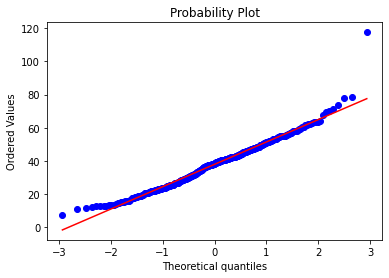

In [ ]:
stats.probplot(df['Y'], dist='norm', plot=py)
py.show()

#QQ-plot (Quantile-Quantile Plot)

Dari QQ-plot di atas menunjukkan bagaimana pendistribusian data dari variabel ynag dipilih, yaitu variabel Y. Plot di atas yaitu plot dari nilai kuantil teoretis dengan nilai kuantil dari variabel yang dipilih. Sehingga plot akan menggambarkan berapa banyak nilai dalam suatu distribusi yang berada di atas atau di bawah batas tertentu. Dari hasil plot di atas didapatkan garis yang hampir lurus, yang berarti pendistribusian data dari variabel tersebut adalah normal.

**c. Apakah ada outlier pada variabel harga rumah? Jika ada, nilainya berapa saja?**

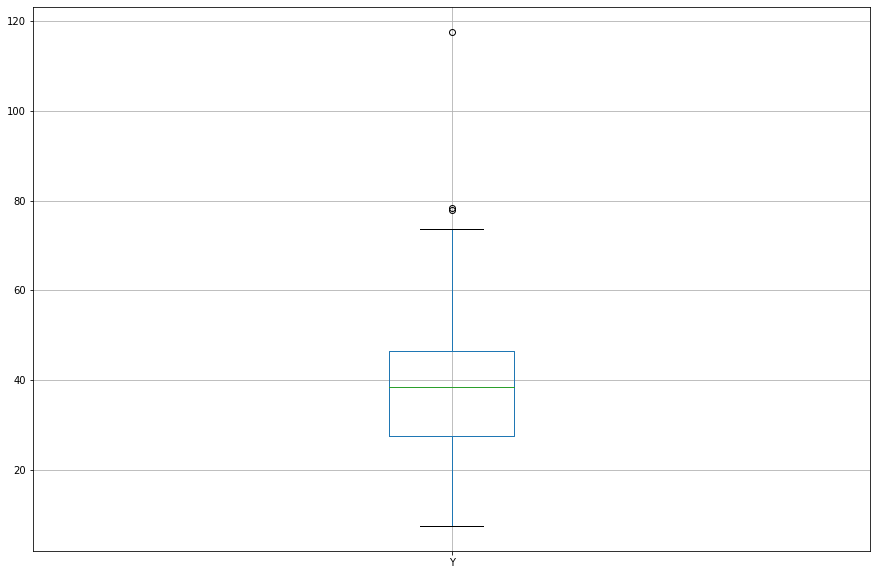

In [ ]:
df[['Y']].boxplot(figsize=(15,10))

Dari hasil visualisasi boxplot vertikal di atas dapat dilihat bahwa terdapat outlier (pencilan) dari variabel Y (harga rumah). Outlier berada di area yang melebihi batas atas (nilai maksimum) yaitu di kisaran harga 70 hingga 120 (kurang lebih ada 3 data).

**d. Variabel yang berkorelasi dengan harga rumah? Seberapa erat hubungannya?**

**Note: Korelasi >= 0.5 ada hubungan erta antara variabel, Korelasi < 0.5 tidak ada hubungan erat antar variabel**

In [ ]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


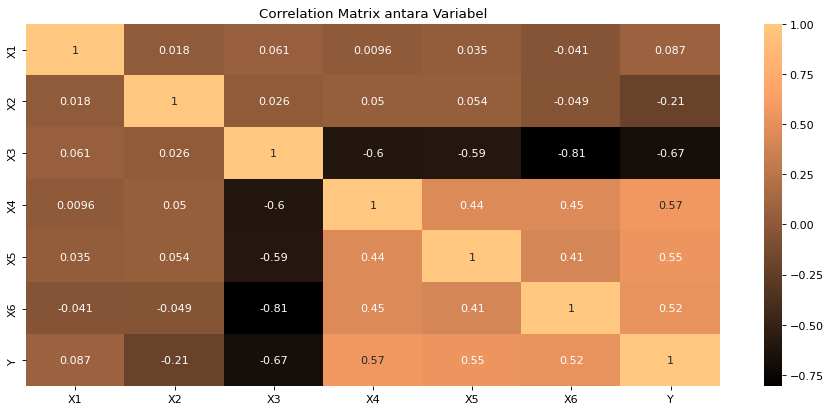

In [ ]:
fig, ax = plt.subplots(figsize=(14,6), dpi=80)
sns.heatmap(df.loc[:, 'X1':'Y'].corr(), cmap='copper', annot=True)
plt.title('Correlation Matrix antara Variabel')
plt.show()

Dari analisis korelasi di atas dapat diketahui bahwa jarak stasiun MRT X3 = -0.67, banyaknya convinience store X4 = 0.57, letak lokasi longitude X5 = 0.54 dan latitude X6 = 0.52 mempengaruhi harga unit rumah.

##Perbandingan Korelasi Antara Variabel

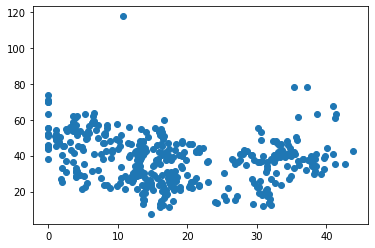

In [ ]:
#House Age vs House Price
plt.scatter(df['X2'], df['Y'])
plt.show()

Scatter plot di atas menunjukkan keterkaitan antara variabel 'House Age' (X2) dengan variabel "House Price' (Y). Scatter plot memperlihatkan plotnya yang menyebar. Hal tersebut menunjukkan bahwa peningkatan pada variabel X2 tidak diikuti dengan peningkatan pada variabel Y, sehingga dapat disimpulkan bahwa antara dua variabel tersebut memiliki hubungan yang rendah.

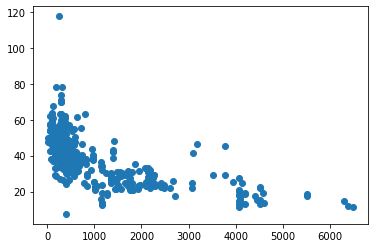

In [ ]:
#distance to nearest MRT station vs House Price
plt.scatter(df['X3'], df['Y'])
plt.show()

Scatter plot di atas menunjukkan keterkaitan antara variabel 'Distance to Nearest MRT Station' (X3) dengan variabel "House Price' (Y). Scatter plot memperlihatkan ketika variabel X3 mengalami kenaikan, maka variabel Y mengalami penurunan. Hal tersebut menunjukkan bahwa antara dua variabel tersebut memiliki hubungan negatif.

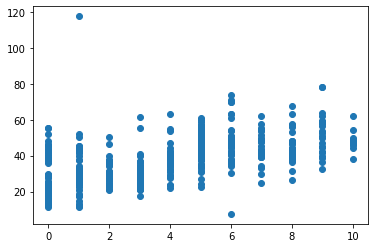

In [ ]:
#convenience store vs House Price
plt.scatter(df['X4'], df['Y'])
plt.show()

Scatter plot di atas menunjukkan keterkaitan antara variabel 'Convenience Store' (X4) dengan variabel "House Price' (Y). Scatter plot memperlihatkan ketika variabel X4 mengalami kenaikan, maka variabel Y juga mengalami kenaikan walupun tidak signifikan dan teratur. Hal tersebut menunjukkan bahwa kedua variabel tersebut saling berkaitan dan memiliki hubungan positif.

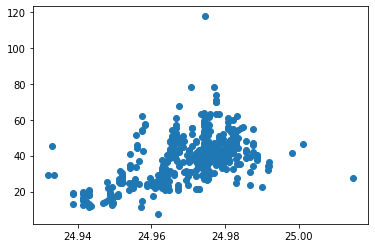

In [ ]:
#latitude vs House Price
plt.scatter(df['X5'], df['Y'])
plt.show()

Scatter plot di atas menunjukkan keterkaitan antara variabel 'Latitude' (X5) dengan variabel "House Price' (Y). Scatter plot memperlihatkan ketika variabel X5 mengalami kenaikan, maka variabel Y juga mengalami kenaikan walupun tidak seragam dan teratur. Namun, dari hal tersebut sudah dapat disimpulkan bahwa kedua variabel tersebut saling berkaitan dan memiliki hubungan positif.

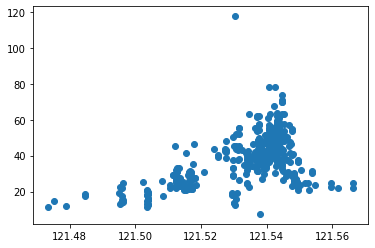

In [ ]:
#longitude vs House Price
plt.scatter(df['X6'], df['Y'])
plt.show()

Scatter plot di atas menunjukkan keterkaitan antara variabel 'Longitude' (X6) dengan variabel "House Price' (Y). Dari Scatter plot tersebut terlihat bahwa ketika variabel X6 mengalami kenaikan, maka variabel Y juga mengalami kenaikan walupun tidak teratur. Dari hal tersebut sudah dapat menunjukkan bahwa kedua variabel tersebut saling berkaitan dan memiliki hubungan positif.

# 3. Pre-Processing

##Feature Engineering

###Cek Multikolinearitas

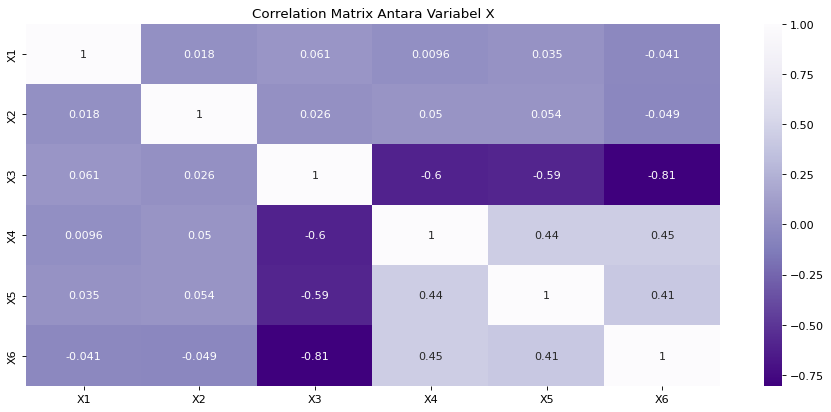

In [ ]:
fig, ax = plt.subplots(figsize=(14,6), dpi=80)
sns.heatmap(df.loc[:, 'X1':'X6'].corr(), cmap='Purples_r', annot=True)
plt.title('Correlation Matrix Antara Variabel X')
plt.show()

Terdapat multikolinearitas antara variabel X3 dan X6 sebesar (-0.81). Maka variabel X6 (Longitude) tidak akan dimasukkan ke dalam model.

Parameter keputusan : 

Dilihat dari koefisien korelasi antara 2 variabel X tersebut dengan variabel Y (korelasi sebelumnya), maka koefisien relasi yang lebih tinggi dengan variabel Y, maka variabel itu yang akan dipertahankan. Di matriks korelasi sebelumnya antara semua variabel X dan Y: X3 (-0.67) > X6 (0.52).

###Check Null Values and Type

In [ ]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

In [ ]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4      int64
X5    float64
X6    float64
Y     float64
dtype: object

# 4. Create Model and Evaluation

##Indexing

In [ ]:
x = df.loc[:, 'X3':'X5']
x

,X3,X4,X5
No,,,
1,84.87882,10,24.98298
2,306.59470,9,24.98034
3,561.98450,5,24.98746
4,561.98450,5,24.98746
5,390.56840,5,24.97937
...,...,...,...
410,4082.01500,0,24.94155
411,90.45606,9,24.97433
412,390.96960,7,24.97923


In [ ]:
y = pd.DataFrame(df['Y'])
y

,Y
No,
1,37.9
2,42.2
3,47.3
4,54.8
5,43.1
...,...
410,15.4
411,50.0
412,40.6


##Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

##Feature Scaling

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
y_train = sc.fit_transform(y_train)

In [ ]:
#merapikan
np.set_printoptions(suppress=True)
print(x_train[:10])
print(y_train[:10])

[[ 0.44628671 -0.69800002 -0.39469155]
 [-0.50081039  0.35376632 -0.31078526]
 [-0.58491054  0.35376632  0.96817463]
 [ 0.80568673 -0.34741124 -0.46149073]
 [-0.5818764   1.75612144  0.99505723]
 [ 3.39483174 -1.0485888  -1.46755153]
 [ 0.78367162 -0.34741124 -0.48674407]
 [ 0.50103578 -0.34741124 -0.13482645]
 [ 2.6247159  -1.39917758 -1.68668542]
 [ 0.74878876 -0.34741124 -0.69447323]]
[[-0.47100939]
 [ 0.1189571 ]
 [ 1.37900898]
 [-0.66766488]
 [ 0.54868578]
 [-1.34503381]
 [-0.28163743]
 [-1.19207954]
 [-1.57810699]
 [-1.03184173]]


#a. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#lakukan inverse agar kembali ke nilai semula (karena sebelumnya distandarisasi)
ypred = sc.inverse_transform(lin_reg.predict((x_train)))
y_pred_tr = pd.DataFrame(ypred)
y_pred_tr

,0
0,31.589003
1,40.178730
2,44.366409
3,30.437686
4,48.561730
...,...
326,41.172697
327,47.915786
328,39.315084
329,31.589003


##MSE (Mean Squared Error)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_lin_reg = mean_squared_error(sc.inverse_transform(y_train), ypred).round(2)
mse_lin_reg

93.27

##MAE (Mean Absolute Error)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_lin_reg = mean_absolute_error(sc.inverse_transform(y_train), ypred).round(2)
mae_lin_reg

6.76

##R-Square

In [ ]:
from sklearn.metrics import r2_score
r2_lin_reg = r2_score(sc.inverse_transform(y_train), ypred).round(2)
r2_lin_reg

0.51

Model regresi ini hanya dapat menjelaskan 51% keragaman datanya. Model regresi yang baik adalah jika r2 > 75%

#b. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [ ]:
ypred_R = sc.inverse_transform(Ridge.predict((x_train)))
y_pred_tr_R = pd.DataFrame(ypred_R)
y_pred_tr_R

,0
0,31.592274
1,40.174020
2,44.362090
3,30.444552
4,48.558586
...,...
326,41.168708
327,47.911423
328,39.308217
329,31.592274


##MSE (Mean Squared Error)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_ridge = mean_squared_error(sc.inverse_transform(y_train), ypred_R).round(2)
mse_ridge

93.27

##MAE (Mean Absolute Error)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_ridge = mean_absolute_error(sc.inverse_transform(y_train), ypred_R).round(2)
mae_ridge

6.76

##R-Square

In [ ]:
from sklearn.metrics import r2_score
r2_ridge = r2_score(sc.inverse_transform(y_train), ypred_R).round(2)
r2_ridge

0.51

#c. Random Forest Regressor



In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train.ravel())

RandomForestRegressor()

In [ ]:
ypred_RFR = sc.inverse_transform(rf_regressor.predict((x_train)).reshape(-1,1))
y_pred_tr_RFR = pd.DataFrame(ypred_RFR)
y_pred_tr_RFR

,0
0,30.030726
1,40.362539
2,57.941081
3,28.245683
4,45.112372
...,...
326,48.939886
327,43.298250
328,91.507567
329,30.030726


##MSE (Mean Squared Error)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_rfr = mean_squared_error(sc.inverse_transform(y_train), ypred_RFR).round(2)
mse_rfr

13.48

##MAE (Mean Absolute Error)



In [ ]:
from sklearn.metrics import mean_absolute_error
mae_rfr = mean_absolute_error(sc.inverse_transform(y_train), ypred_RFR).round(2)
mae_rfr

2.58

##R-Square

In [ ]:
from sklearn.metrics import r2_score
r2_rfr = r2_score(sc.inverse_transform(y_train), ypred_RFR).round(2)
r2_rfr

0.93

Q6 buat model dan evaluation score

#d. SVR (Support Vector Regression)

In [ ]:
from sklearn.svm import SVR
sv_regressor = SVR()
sv_regressor.fit(x_train, y_train.ravel())

SVR()

In [ ]:
ypred_svr = sc.inverse_transform(sv_regressor.predict((x_train)).reshape(-1,1))
y_pred_tr_svr = pd.DataFrame(ypred_svr)
y_pred_tr_svr

,0
0,26.426766
1,38.727750
2,47.088129
3,26.308547
4,43.700056
...,...
326,41.665673
327,46.254767
328,42.151629
329,26.426766


##MSE (Mean Squared Error)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_svr = mean_squared_error(sc.inverse_transform(y_train), ypred_svr).round(2)
mse_svr

69.18

##MAE (Mean Absolute Error)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_svr = mean_absolute_error(sc.inverse_transform(y_train), ypred_svr).round(2)
mae_svr

5.29

##R-Square

In [ ]:
from sklearn.metrics import r2_score
r2_svr = r2_score(sc.inverse_transform(y_train), ypred_svr).round(2)
r2_svr

0.63

# 5. Model Comparison

In [ ]:
data = np.array([['', 'R-Square', 'MSE', 'MAE'],
                 ['Linear Regression', r2_lin_reg, mse_lin_reg, mae_lin_reg],
                 ['Ridge', r2_ridge, mse_ridge, mae_ridge],
                 ['Random Forest', r2_rfr, mse_rfr, mae_rfr],
                 ['SVR', r2_svr, mse_svr, mae_svr]])

In [ ]:
data

array([['', 'R-Square', 'MSE', 'MAE'],
       ['Linear Regression', '0.51', '93.27', '6.76'],
       ['Ridge', '0.51', '93.27', '6.76'],
       ['Random Forest', '0.93', '13.48', '2.58'],
       ['SVR', '0.63', '69.18', '5.29']], dtype='<U32')

##Table of Model Comparison

In [ ]:
table = pd.DataFrame(data = data[1:,1:],
                     index = data[1:,0],
                     columns = data[0,1:])

In [ ]:
table

,R-Square,MSE,MAE
Linear Regression,0.51,93.27,6.76
Ridge,0.51,93.27,6.76
Random Forest,0.93,13.48,2.58
SVR,0.63,69.18,5.29


_________________________________________________________________________________________

**Kesimpulan**

Untuk menentukan model terbaik dalam memprediksi harga rumah, digunakanlah evaluasi berupa perhitungan skor R-Square, MSE dan MAE. Dengan catatan, hal utama yang harus diperhatikan adalah besarnya skor R-Square, yang mana model yang baik adalah model yang memiliki skor R-Square lebih dari 75%. Apabila ada beberapa model yang memiliki skor R-Square sama, maka perlu meninjau skor MSE dan MAE yaitu tingkat kesalahan prediksi sebagai pertimbangan selanjutnya, dengan catatan model yang baik adalah model yang memiliki skor MSE dan MAE rendah.

Maka, dari 4 model di atas berdasarkan skor evaluasi R-Square dapat dilihat bahwa model Random Forest memiliki skor tertinggi yaitu 0.93 yang artinya model dapat menggambarkan atau menjelaskan keragaman datanya hingga 93%. Sehingga, dalam projek prediksi harga rumah ini dapat menggunakan model Random Forest untuk mengeksekusi prediksinya.

**END OF CODE**